In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# Load dataset
data = pd.read_csv("data/spam_sms.csv", delimiter=",")

In [19]:
data.columns

Index(['v1', 'v2'], dtype='object')

In [3]:



# Convert text labels in 'v1' to numerical values
data['v1'] = data['v1'].map({'ham': 0, 'spam': 1})

# Rename columns: 'label' to 'v1' and 'message' to 'v2'

data.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

In [4]:
data.head(5)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset


# Preprocessing
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['message'])  # Use 'v2' for messages
y = data['label']  # Use 'v1' for labels now containing 0 and 1

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9444
Confusion Matrix:
 [[962   3]
 [ 59  91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.97      0.61      0.75       150

    accuracy                           0.94      1115
   macro avg       0.96      0.80      0.86      1115
weighted avg       0.95      0.94      0.94      1115



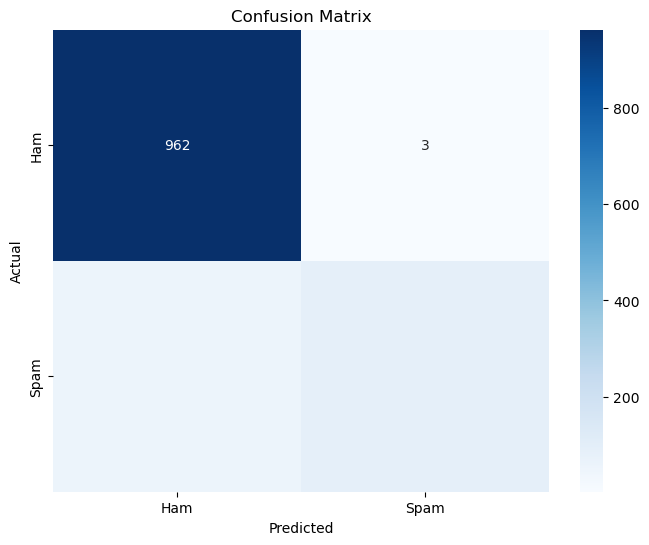

In [31]:
# Visualization of Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler  # Import RandomOverSampler

# Load dataset
# Assuming 'data' is already loaded and preprocessed with 'label' and 'message' columns

# Text vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['message'])  # 'message' for text
y = data['label']  # 'label' for the target

# Resampling to handle class imbalance
ros = RandomOverSampler(random_state=42)  # Initialize oversampler
X_resampled, y_resampled = ros.fit_resample(X, y)  # Apply oversampling

# Split resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9886
Confusion Matrix:
 [[973  12]
 [ 10 935]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       985
           1       0.99      0.99      0.99       945

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930



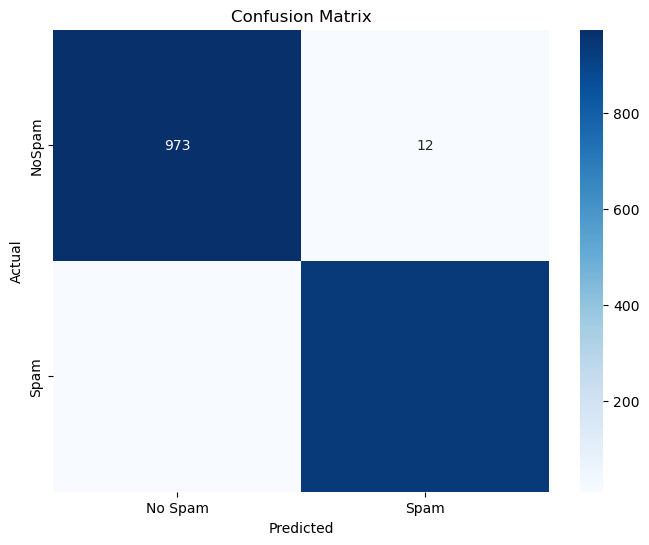

In [8]:
# Visualization of Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Spam', 'Spam'], yticklabels=['NoSpam', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()